In [1]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


/home/joao/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


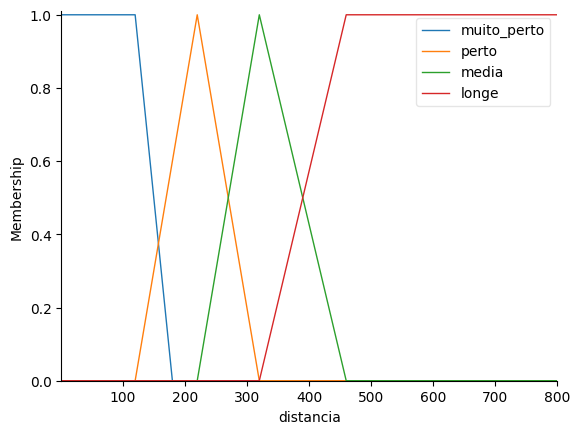

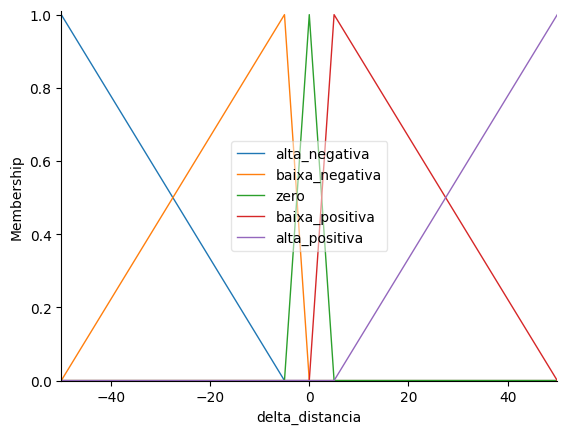

In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions

in_distancia = np.arange(1, 801, 1)
in_delta_distancia = np.arange(-50, 51, 1)

distancia = ctrl.Antecedent(in_distancia, 'distancia')
delta_distancia =ctrl.Antecedent(in_delta_distancia, 'delta_distancia')
aceleracao =ctrl.Consequent(np.arange(0.8, 1.21, 0.01), 'aceleracao')
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
distancia['muito_perto'] = fuzz.trapmf(distancia.universe, [0, 0, 120, 180])
distancia['perto'] = fuzz.trimf(distancia.universe, [120,220,320])
distancia['media'] = fuzz.trimf(distancia.universe, [220, 320, 460])
distancia['longe'] = fuzz.trapmf(distancia.universe, [320, 460, 800, 800])

delta_distancia['alta_negativa'] = fuzz.trapmf(delta_distancia.universe, [-50, -50, -50,-5])
delta_distancia['baixa_negativa'] = fuzz.trimf(delta_distancia.universe, [-50, -5, 0])
delta_distancia['zero'] = fuzz.trimf(delta_distancia.universe, [-5, 0, 5])
delta_distancia['baixa_positiva'] = fuzz.trimf(delta_distancia.universe, [0, 5, 50])
delta_distancia['alta_positiva'] = fuzz.trapmf(delta_distancia.universe, [5, 50, 50,50])
# You can see how these look with .view()
distancia.view()
delta_distancia.view()

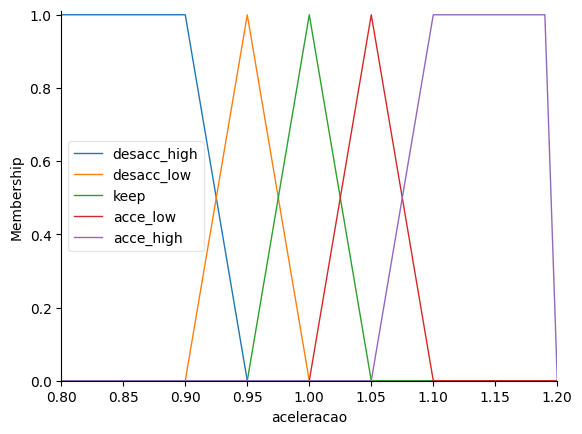

In [31]:
aceleracao['desacc_high'] = fuzz.trapmf(aceleracao.universe, [0.8, 0.8, 0.9, 0.95])
aceleracao['desacc_low'] = fuzz.trimf(aceleracao.universe, [0.9,0.95,1.0])
aceleracao['keep'] = fuzz.trimf(aceleracao.universe, [0.95,1.0,1.05])
aceleracao['acce_low'] = fuzz.trimf(aceleracao.universe, [1.0,1.05,1.1])
aceleracao['acce_high'] = fuzz.trapmf(aceleracao.universe, [1.05,1.1,1.2,1.2])
aceleracao.view()

In [32]:
regra1 = ctrl.Rule(distancia['longe']& delta_distancia['alta_negativa'],aceleracao['acce_high'])
regra2 = ctrl.Rule(distancia['longe']& delta_distancia['baixa_negativa'],aceleracao['acce_high'])
regra3 = ctrl.Rule(distancia['longe']& delta_distancia['zero'],aceleracao['acce_high'])
regra4 = ctrl.Rule(distancia['longe']& delta_distancia['baixa_positiva'],aceleracao['acce_high'])
regra5 = ctrl.Rule(distancia['longe']& delta_distancia['alta_positiva'],aceleracao['acce_high'])

regra6 = ctrl.Rule(distancia['media']& delta_distancia['alta_negativa'],aceleracao['keep'])
regra7 = ctrl.Rule(distancia['media']& delta_distancia['baixa_negativa'],aceleracao['acce_low'])
regra8 = ctrl.Rule(distancia['media']& delta_distancia['zero'],aceleracao['acce_high'])
regra9 = ctrl.Rule(distancia['media']& delta_distancia['baixa_positiva'],aceleracao['acce_high'])
regra10 = ctrl.Rule(distancia['media']& delta_distancia['alta_positiva'],aceleracao['acce_high'])

regra11 = ctrl.Rule(distancia['perto']& delta_distancia['alta_negativa'],aceleracao['desacc_high'])
regra12 = ctrl.Rule(distancia['perto']& delta_distancia['baixa_negativa'],aceleracao['desacc_low'])
regra13 = ctrl.Rule(distancia['perto']& delta_distancia['zero'],aceleracao['acce_low'])
regra14 = ctrl.Rule(distancia['perto']& delta_distancia['baixa_positiva'],aceleracao['acce_low'])
regra15 = ctrl.Rule(distancia['perto']& delta_distancia['alta_positiva'],aceleracao['acce_high'])

regra16 = ctrl.Rule(distancia['muito_perto']& delta_distancia['alta_negativa'],aceleracao['desacc_high'])
regra17 = ctrl.Rule(distancia['muito_perto']& delta_distancia['baixa_negativa'],aceleracao['keep'])
regra18 = ctrl.Rule(distancia['muito_perto']& delta_distancia['zero'],aceleracao['keep'])
regra19 = ctrl.Rule(distancia['muito_perto']& delta_distancia['baixa_positiva'],aceleracao['keep'])
regra20 = ctrl.Rule(distancia['muito_perto']& delta_distancia['alta_positiva'],aceleracao['acce_high'])

In [33]:
robo_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6,regra7,regra8,regra9,regra10,regra11,regra12,regra13,regra14,regra15,regra16,regra17,regra18,regra19,regra20])
robo = ctrl.ControlSystemSimulation(robo_ctrl)

1.134166666666667


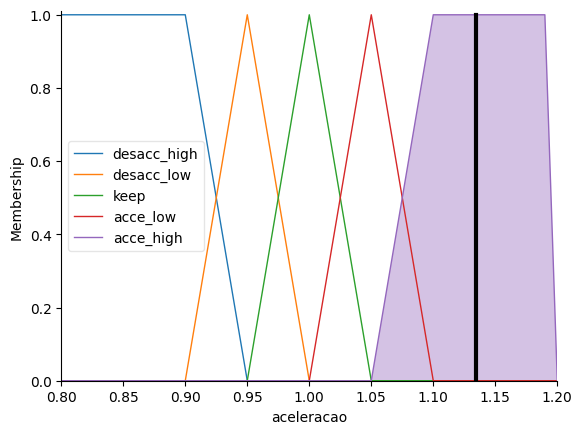

In [36]:
robo.input['distancia'] = 320
robo.input['delta_distancia'] = 0
robo.compute()
print (robo.output['aceleracao'])
aceleracao.view(sim=robo)

In [ ]:
xv, yv = np.meshgrid(in_distancia, in_delta_distancia)

robo.input['distancia'] = xv
robo.input['delta_distancia'] = yv
robo.compute()

print(robo.output['aceleracao'])

[[0.07777778 0.07777778 0.07777778 ... 0.47333333 0.47333333 0.47333333]
 [0.07777778 0.07777778 0.07777778 ... 0.47333333 0.47333333 0.47333333]
 [0.07777778 0.07777778 0.07777778 ... 0.47333333 0.47333333 0.47333333]
 ...
 [0.3        0.3        0.3        ... 0.47333333 0.47333333 0.47333333]
 [0.3        0.3        0.3        ... 0.47333333 0.47333333 0.47333333]
 [0.3        0.3        0.3        ... 0.47333333 0.47333333 0.47333333]]


In [ ]:
import matplotlib.pyplot as plt

print(xv.shape)
print(yv.shape)

print(robo.output['aceleracao'].shape)

exit(1)

(201, 800)
(201, 800)
(201, 800)


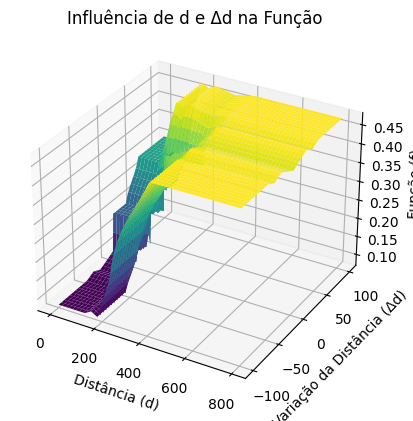

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, robo.output['aceleracao'], cmap='viridis')
ax.set_xlabel('Distância (d)')
ax.set_ylabel('Variação da Distância (Δd)')
ax.set_zlabel('Função (f)')
plt.title('Influência de d e Δd na Função')
plt.show()